In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Conv2DTranspose, Reshape, BatchNormalization, Dropout, Input, ReLU, LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading and Preparing Cervical Cancer Images Dataset using Keras Image Data Generator
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 256, 256
batchsize = 32

# Define the directories
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory="C:/Users/arthi/Downloads/Malhari Dataset/Malhari Dataset/Malhari_Dataset_V1",
    target_size=(img_width, img_height),
    batch_size=batchsize,
    class_mode='categorical',  # or 'binary' if it's a binary classification
    subset='training'  # Only for training data
)
colposcopic_generator = train_datagen.flow_from_directory(
    directory="C:/Users/arthi/Downloads/Malhari Dataset/Malhari Dataset/Malhari_Dataset_V1/colposcopic",
    target_size=(img_width, img_height),
    batch_size=batchsize,
    class_mode='categorical',  # or 'binary' if it's a binary classification
)

pap_generator = train_datagen.flow_from_directory(
    directory="C:/Users/arthi/Downloads/Malhari Dataset/Malhari Dataset/Malhari_Dataset_V1/pap",
    target_size=(img_width, img_height),
    batch_size=batchsize,
    class_mode='categorical',  # or 'binary' if it's a binary classification
)

Found 452 images belonging to 2 classes.
Found 134 images belonging to 3 classes.
Found 318 images belonging to 4 classes.


In [4]:
img_width, img_height = 256, 256
batchsize = 32

train = keras. utils.image_dataset_from_directory(
    directory="C:/Users/arthi/Downloads/Malhari Dataset/Malhari Dataset/Malhari_Dataset_V1",
    batch_size = batchsize,
    image_size = (img_width, img_height))

Found 452 files belonging to 2 classes.


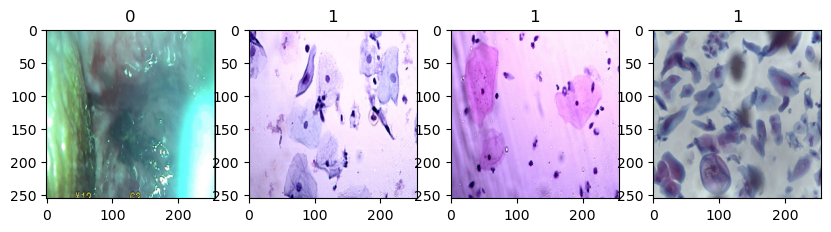

In [5]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(10,10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [6]:
# generating augmented batches of cervical cancer images using ImageDataGenerator
DIR = "C:/Users/arthi/Downloads/Malhari Dataset/Malhari Dataset/Malhari_Dataset_V1" #path

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
        DIR,
        target_size = (64, 64),
        batch_size = batchsize,
        class_mode = None)

Found 452 images belonging to 2 classes.


In [7]:
# generator model 

KI = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
input_dim = 300

def Generator_Model():

    Generator = Sequential()

    # random noise
    Generator.add(Dense(8 * 8 * 512, input_dim = input_dim))
    Generator.add(ReLU())
    # convert 1d to 3d
    Generator.add(Reshape((8, 8, 512)))
    # Unsample
    Generator.add(Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='ReLU'))
    Generator.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='ReLU'))
    Generator.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='ReLU'))
    Generator.add(Conv2D(3, (4, 4), padding='same', activation='sigmoid'))
    return Generator
    
generator = Generator_Model()
generator.summary()
# visualized layers of generator
keras.utils.plot_model(generator, show_shapes=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32768)             9863168   
                                                                 
 re_lu (ReLU)                (None, 32768)             0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 256)      2097408   
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 128)      524416    
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 64, 64, 64)       1

In [8]:
# creating the discriminator Model 

def Discriminator_Model():
    input_shape = (64, 64, 3)

    # Create a Sequential model
    discriminator = Sequential()
    discriminator.add(Conv2D(64,kernel_size=(3, 3), activation='LeakyReLU', input_shape = input_shape))
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))
    discriminator.add(Conv2D(128, kernel_size=(3, 3), activation='LeakyReLU'))
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))
    discriminator.add(Conv2D(256, kernel_size=(3, 3), activation='LeakyReLU'))
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))
    discriminator.add(Flatten())
    discriminator.add(Dense(256, activation='LeakyReLU'))
    discriminator.add(Dense(1, activation='sigmoid'))

    return discriminator
# training The CNN
discriminator = Discriminator_Model()
discriminator.summary()  

# visualized Layers of discriminator
keras.utils.plot_model(discriminator, show_shapes=True)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 256)       

In [18]:
import tensorflow as tf
from tensorflow.keras import Model, metrics

class DCGAN(Model):
    def __init__(self, generator, discriminator, latent_dim):
        super(DCGAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.latent_dim = latent_dim
        self.g_loss_metric = metrics.Mean(name='g_loss')
        self.d_loss_metric = metrics.Mean(name='d_loss')

    @property
    def metrics(self):
        return [self.g_loss_metric, self.d_loss_metric]

    def compile(self, g_optimizer, d_optimizer, loss_fn):
        super(DCGAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_fn = loss_fn
        
    def train_step(self, real_images):
        self.g_loss_metric.reset_states()
        self.d_loss_metric.reset_states()

    # Get batch size from the data
        batch_size = tf.shape(real_images)[0]

    # Generate random noise
        random_noise = tf.random.normal(shape=(batch_size, self.latent_dim))

    # Train the discriminator
        with tf.GradientTape() as d_tape:
            pred_real = self.discriminator(real_images, training=True)
            real_labels = tf.ones((batch_size, 1)) + 0.05 * tf.random.uniform((batch_size, 1))  # Label smoothing
            d_loss_real = self.loss_fn(real_labels, pred_real)

        # Discriminator on fake images
            fake_images = self.generator(random_noise, training=True)
            pred_fake = self.discriminator(fake_images, training=True)
            fake_labels = tf.zeros((batch_size, 1))
            d_loss_fake = self.loss_fn(fake_labels, pred_fake)

        # Total discriminator loss
            d_loss = (d_loss_real + d_loss_fake) / 2

    # Compute discriminator gradients
        d_gradients = d_tape.gradient(d_loss, self.discriminator.trainable_variables)
    # Update the discriminator weights
        self.d_optimizer.apply_gradients(zip(d_gradients, self.discriminator.trainable_variables))

    # Train the generator
        with tf.GradientTape() as g_tape:
            fake_images = self.generator(random_noise, training=True)
            pred_fake = self.discriminator(fake_images, training=True)
        # Generator wants the discriminator to think fake images are real
            g_loss = self.loss_fn(tf.ones((batch_size, 1)), pred_fake)

    # Compute generator gradients
        g_gradients = g_tape.gradient(g_loss, self.generator.trainable_variables)
    # Update the generator weights
        self.g_optimizer.apply_gradients(zip(g_gradients, self.generator.trainable_variables))

    # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)

        return {'d_loss': self.d_loss_metric.result(), 'g_loss': self.g_loss_metric.result()}


    

In [23]:
class DCGANMonitor(tf.keras.callbacks.Callback):
    def __init__(self, num_imgs=25, latent_dim=300, save_path='results/generated_images_epoch_{epoch}.png'):
        """
        Monitor to generate and save images during DCGAN training.

        Parameters:
        - num_imgs (int): Number of images to generate at the end of each epoch.
        - latent_dim (int): Dimensionality of the latent space.
        - save_path (str): Path format to save generated images. Include `{epoch}` for epoch number.
        """
        self.num_imgs = num_imgs
        self.latent_dim = latent_dim
        self.save_path = save_path
        self.noise = tf.random.normal([num_imgs, latent_dim])

    def on_epoch_end(self, epoch, logs=None):
        # Generate images from random noise
        generated_images = self.model.generator(self.noise, training=False)

        # Denormalize images (assuming generator output is normalized between -1 and 1)
        generated_images = (generated_images * 127.5) + 127.5
        generated_images = tf.clip_by_value(generated_images, 0, 255).numpy().astype('uint8')

        # Save the generated images
        self._save_images(generated_images, epoch)

    def _save_images(self, images, epoch):
        # Create a grid of generated images and save
        grid_size = int(self.num_imgs ** 0.5)
        fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))

        for i, ax in enumerate(axes.flat):
            if i < images.shape[0]:
                ax.imshow(images[i])
                ax.axis('off')

        plt.tight_layout()
        save_file = self.save_path.format(epoch=epoch + 1)
        os.makedirs(os.path.dirname(save_file), exist_ok=True)  # Ensure directory exists
        plt.savefig(save_file)
        plt.close()

    def on_train_end(self, logs=None):
        # Save the generator model at the end of training
        self.model.generator.save('DCGEN.h5')


In [24]:
epochs = 50
lr_g =0.0003
lr_d = 0.0001
beta = 0.5
latent_dim = 300

dcgan = DCGAN(generator=generator, discriminator=discriminator, latent_dim = latent_dim )
dcgan.compile(g_optimizer = Adam (learning_rate= lr_g, beta_1= beta), d_optimizer= Adam (learning_rate = lr_g , beta_1= beta), loss_fn = BinaryCrossentropy())

# fit the model and save the history
history = dcgan.fit(
    train_generator, 
    epochs=epochs, 
    callbacks=[DCGANMonitor(latent_dim=300, save_path='results/generated_images_epoch_{epoch}.png')]
)

Epoch 1/50
15/15 [==============================] - 45s 3s/step - d_loss: 0.4396 - g_loss: 0.9454
Epoch 2/50
15/15 [==============================] - 44s 3s/step - d_loss: 0.5760 - g_loss: 1.5036
Epoch 3/50
15/15 [==============================] - 44s 3s/step - d_loss: 0.9680 - g_loss: 2.1866
Epoch 4/50
15/15 [==============================] - 45s 3s/step - d_loss: 0.4330 - g_loss: 0.9568
Epoch 5/50
15/15 [==============================] - 44s 3s/step - d_loss: 0.2700 - g_loss: 2.4689
Epoch 6/50
15/15 [==============================] - 44s 3s/step - d_loss: 0.3051 - g_loss: 2.4582
Epoch 7/50
15/15 [==============================] - 44s 3s/step - d_loss: 0.2584 - g_loss: 4.0574
Epoch 8/50
15/15 [==============================] - 45s 3s/step - d_loss: 0.0952 - g_loss: 1.8930
Epoch 9/50
15/15 [==============================] - 44s 3s/step - d_loss: 0.2690 - g_loss: 2.7091
Epoch 10/50
15/15 [==============================] - 44s 3s/step - d_loss: -0.0145 - g_loss: 2.8103
Epoch 11/50
15/15 

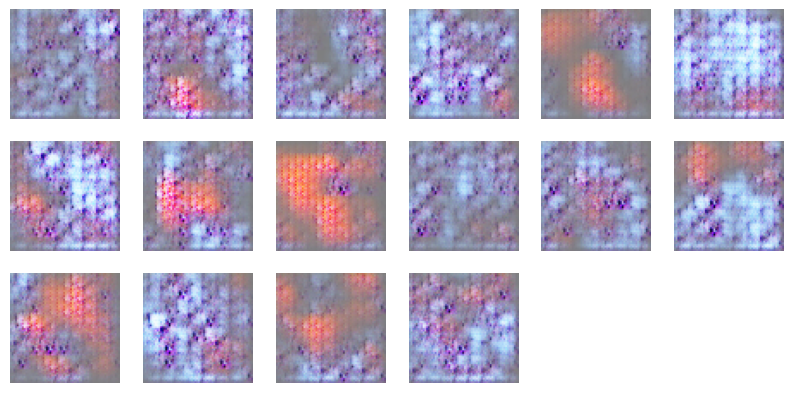

In [25]:
# generating 16 random images with DCGAN

plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(6, 6, i + 1)
    # Generate random noise for each image
    noise = tf.random.normal([1, 300])
    mg = dcgan.generator(noise)
    # Denormalize
    mg = (mg * 255) + 255

    mg.numpy()
    image = Image.fromarray(np.uint8(mg[0]))

    plt.imshow(image)
    plt.axis('off')

plt.show()

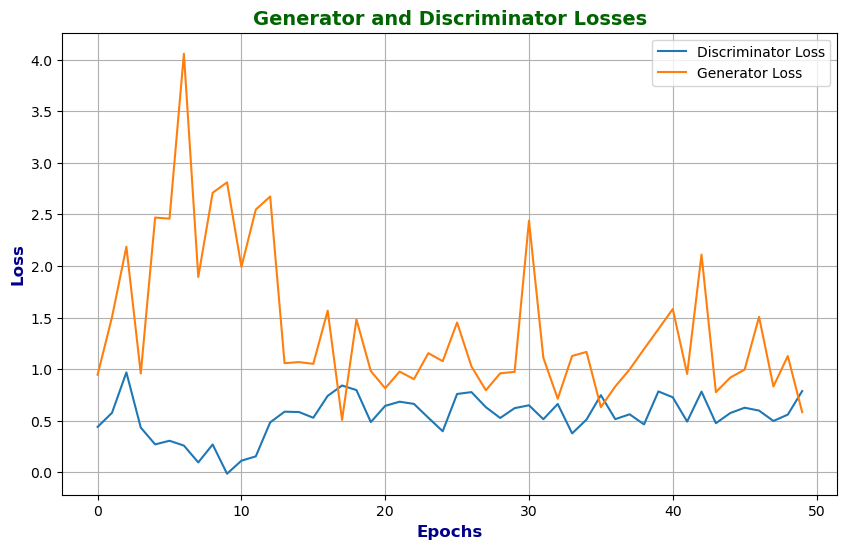

In [26]:
# function to create a figure for the losses
def create_loss_figure(d_loss_values, g_loss_values):
    plt.figure(figsize=(10, 6))
    plt.plot(d_loss_values, label='Discriminator Loss')
    plt.plot(g_loss_values, label='Generator Loss')
    plt.title('Generator and Discriminator Losses', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
    plt.xlabel('Epochs', fontsize = 12, fontweight = 'bold', color = 'darkblue')
    plt.ylabel('Loss', fontsize = 12, fontweight = 'bold', color = 'darkblue')
    plt.legend()
    plt.grid(True)
    plt.savefig('Generator and Discriminator Losses.png')
    plt.show()

# access the loss values from the history
d_loss_values = history.history['d_loss']
g_loss_values = history.history['g_loss']

# call the create_loss_figure function with the loss values
create_loss_figure(d_loss_values, g_loss_values)